In [1]:
import sympy as sp

In [2]:
w1, w2 = sp.symbols('w1 w2')
q1, q2, x = sp.symbols('q1 q2 x')
L1, L2, EI1, EI2 = sp.symbols('L1 L2 EI1 EI2')
C1, C2, C3, C4, C5, C6, C7, C8 = sp.symbols('C1 C2 C3 C4 C5 C6 C7 C8')

Algemene oplossing voor verplaatsingvelden 1 en 2:

In [3]:
w1 = (q1*x**4)/(24*EI1)+C1+C2*x+C3*x**2+C4*x**3
w2 = (q2*x**4)/(24*EI2)+C5+C6*x+C7*x**2+C8*x**3
display(w1)
display(w2)

C1 + C2*x + C3*x**2 + C4*x**3 + q1*x**4/(24*EI1)

C5 + C6*x + C7*x**2 + C8*x**3 + q2*x**4/(24*EI2)

Basis mechanica-relaties:

In [4]:
phi1 = -sp.diff(w1, x)
kappa1 = sp.diff(phi1, x)
M1 = EI1 * kappa1
V1 = sp.diff(M1, x)
phi2 = -sp.diff(w2, x)
kappa2 = sp.diff(phi2, x)
M2 = EI2 * kappa2
V2 = sp.diff(M2, x)

Randvoorwaarden en overgangsvoorwaarden:

In [5]:
Eq1 = sp.Eq(w1.subs(x, 0), 0) 
Eq2 = sp.Eq(M1.subs(x, 0), 0)
Eq3 = sp.Eq(w1.subs(x, L1), 0)
Eq4 = sp.Eq(w2.subs(x, L1), 0)
Eq5 = sp.Eq(phi1.subs(x, L1), phi2.subs(x, L1)) 
Eq6 = sp.Eq(M1.subs(x, L1), M2.subs(x, L1)) 
Eq7 = sp.Eq(w2.subs(x, L1+L2), 0)
Eq8 = sp.Eq(M2.subs(x, L1+L2), 0)

Oplossing van integratieconstanten:

In [6]:
sol = sp.solve((Eq1,Eq2,Eq3,Eq4,Eq5,Eq6,Eq7,Eq8),(C1,C2,C3,C4,C5,C6,C7,C8))
display(sol)

{C1: 0,
 C2: (2*EI1*L1**3*L2*q1 - EI1*L1*L2**3*q2 + EI2*L1**4*q1)/(48*EI1**2*L2 + 48*EI1*EI2*L1),
 C3: 0,
 C4: (-4*EI1*L1**2*L2*q1 + EI1*L2**3*q2 - 3*EI2*L1**3*q1)/(48*EI1**2*L1*L2 + 48*EI1*EI2*L1**2),
 C5: (2*EI1*L1**4*L2**2*q2 + 5*EI1*L1**3*L2**3*q2 + 3*EI1*L1**2*L2**4*q2 + EI2*L1**6*q1 + 3*EI2*L1**5*L2*q1 + 2*EI2*L1**5*L2*q2 + 2*EI2*L1**4*L2**2*q1 + 4*EI2*L1**4*L2**2*q2 - 2*EI2*L1**2*L2**4*q2)/(48*EI1*EI2*L2**2 + 48*EI2**2*L1*L2),
 C6: (-8*EI1*L1**3*L2**2*q2 - 15*EI1*L1**2*L2**3*q2 - 6*EI1*L1*L2**4*q2 - 3*EI2*L1**5*q1 - 6*EI2*L1**4*L2*q1 - 8*EI2*L1**4*L2*q2 - 2*EI2*L1**3*L2**2*q1 - 12*EI2*L1**3*L2**2*q2 + 2*EI2*L1*L2**4*q2)/(48*EI1*EI2*L2**2 + 48*EI2**2*L1*L2),
 C7: (4*EI1*L1**2*L2**2*q2 + 5*EI1*L1*L2**3*q2 + EI1*L2**4*q2 + EI2*L1**4*q1 + EI2*L1**3*L2*q1 + 4*EI2*L1**3*L2*q2 + 4*EI2*L1**2*L2**2*q2)/(16*EI1*EI2*L2**2 + 16*EI2**2*L1*L2),
 C8: (-8*EI1*L1*L2**2*q2 - 5*EI1*L2**3*q2 - EI2*L1**3*q1 - 8*EI2*L1**2*L2*q2 - 4*EI2*L1*L2**2*q2)/(48*EI1*EI2*L2**2 + 48*EI2**2*L1*L2)}

Hoekverdraaing op de randen van het linkerveld en de zakking halverwege veld 1:

In [7]:
w1_sol = w1.subs(sol)
phi1_sol = phi1.subs(sol)
M1_sol = M1.subs(sol)
V1_sol = V1.subs(sol)
w2_sol = w2.subs(sol)
phi2_sol = phi2.subs(sol)
M2_sol = M2.subs(sol)
V2_sol = V2.subs(sol)
display(phi1_sol.subs(x,0))
display(phi1_sol.subs(x,L1))
display(w1_sol.subs(x,L1/2))

-(2*EI1*L1**3*L2*q1 - EI1*L1*L2**3*q2 + EI2*L1**4*q1)/(48*EI1**2*L2 + 48*EI1*EI2*L1)

-3*L1**2*(-4*EI1*L1**2*L2*q1 + EI1*L2**3*q2 - 3*EI2*L1**3*q1)/(48*EI1**2*L1*L2 + 48*EI1*EI2*L1**2) - (2*EI1*L1**3*L2*q1 - EI1*L1*L2**3*q2 + EI2*L1**4*q1)/(48*EI1**2*L2 + 48*EI1*EI2*L1) - L1**3*q1/(6*EI1)

L1**3*(-4*EI1*L1**2*L2*q1 + EI1*L2**3*q2 - 3*EI2*L1**3*q1)/(8*(48*EI1**2*L1*L2 + 48*EI1*EI2*L1**2)) + L1*(2*EI1*L1**3*L2*q1 - EI1*L1*L2**3*q2 + EI2*L1**4*q1)/(2*(48*EI1**2*L2 + 48*EI1*EI2*L1)) + L1**4*q1/(384*EI1)

Specifiek probleem met getallenvoorbeeld:

In [8]:
w1_subs = w1_sol.subs([(EI1,1000),(EI2,1000),(q1,5),(L1,10),(q2,0),(L2,5)])
phi1_subs = phi1_sol.subs([(EI1,1000),(EI2,1000),(q1,5),(L1,10),(q2,0),(L2,5)])
M1_subs = M1_sol.subs([(EI1,1000),(EI2,1000),(q1,5),(L1,10),(q2,0),(L2,5)])
V1_subs = V1_sol.subs([(EI1,1000),(EI2,1000),(q1,5),(L1,10),(q2,0),(L2,5)])
w2_subs = w2_sol.subs([(EI1,1000),(EI2,1000),(q1,5),(L1,10),(q2,0),(L2,5)])
phi2_subs = phi2_sol.subs([(EI1,1000),(EI2,1000),(q1,5),(L1,10),(q2,0),(L2,5)])
M2_subs = M2_sol.subs([(EI1,1000),(EI2,1000),(q1,5),(L1,10),(q2,0),(L2,5)])
V2_subs = V2_sol.subs([(EI1,1000),(EI2,1000),(q1,5),(L1,10),(q2,0),(L2,5)])

Resultaten:

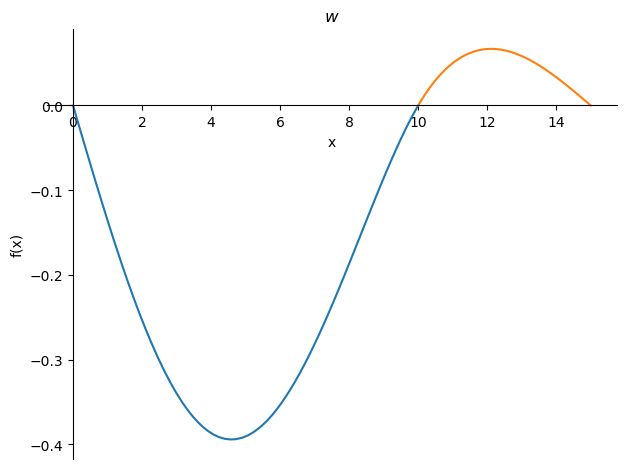

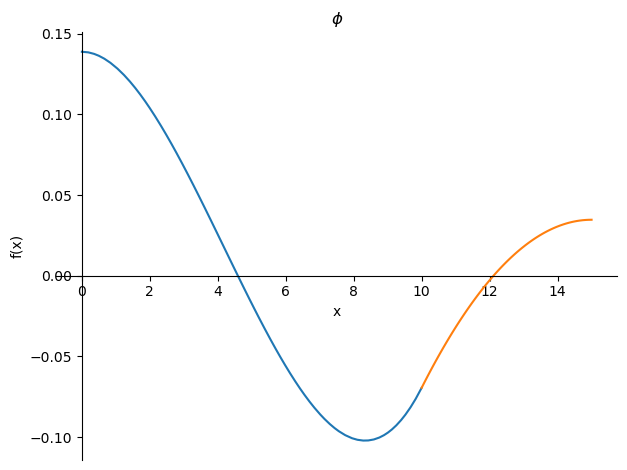

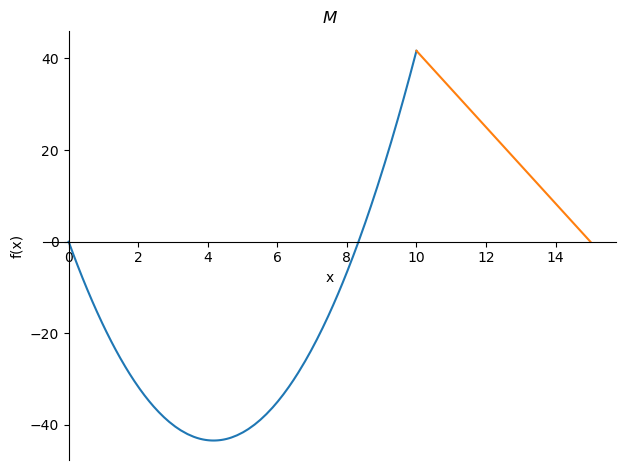

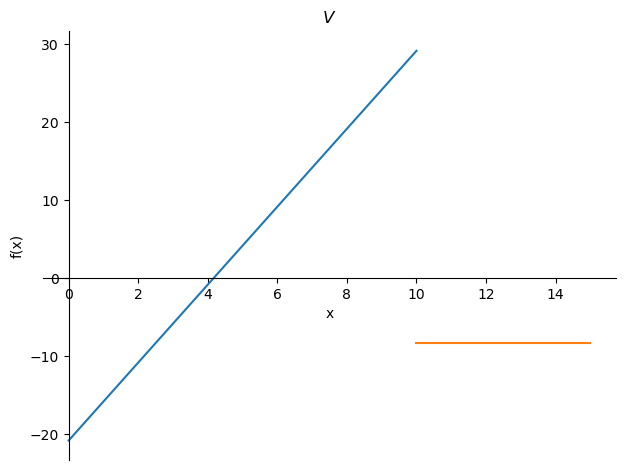

In [9]:
sp.plot((-w1_subs,(x,0,10)),(-w2_subs,(x,10,15)),title='$w$')
sp.plot((-phi1_subs,(x,0,10)),(-phi2_subs,(x,10,15)),title='$\phi$')
sp.plot((-M1_subs,(x,0,10)),(-M2_subs,(x,10,15)),title='$M$')
sp.plot((-V1_subs,(x,0,10)),(-V2_subs,(x,10,15)),title='$V$');

Steunpuntsmoment:

In [10]:
display(M1_subs.subs(x,10).evalf())

-41.6666666666667